In [1]:
!pip install keras
!pip install tensorflow

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("./Data/heart.csv")
pd.set_option('display.max_columns', None)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


Dataset description

In [4]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\marti\AppData\Local\Temp\ipykernel_28768\3731194287.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'sex',  palette='Set3', data = df, order = df['sex'].value_counts().index)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\3731194287.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'cp', palette='Set3', data = df)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\3731194287.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'fbs', palette='Set3', data = df)


Text(0.5, 1.0, 'fbs')

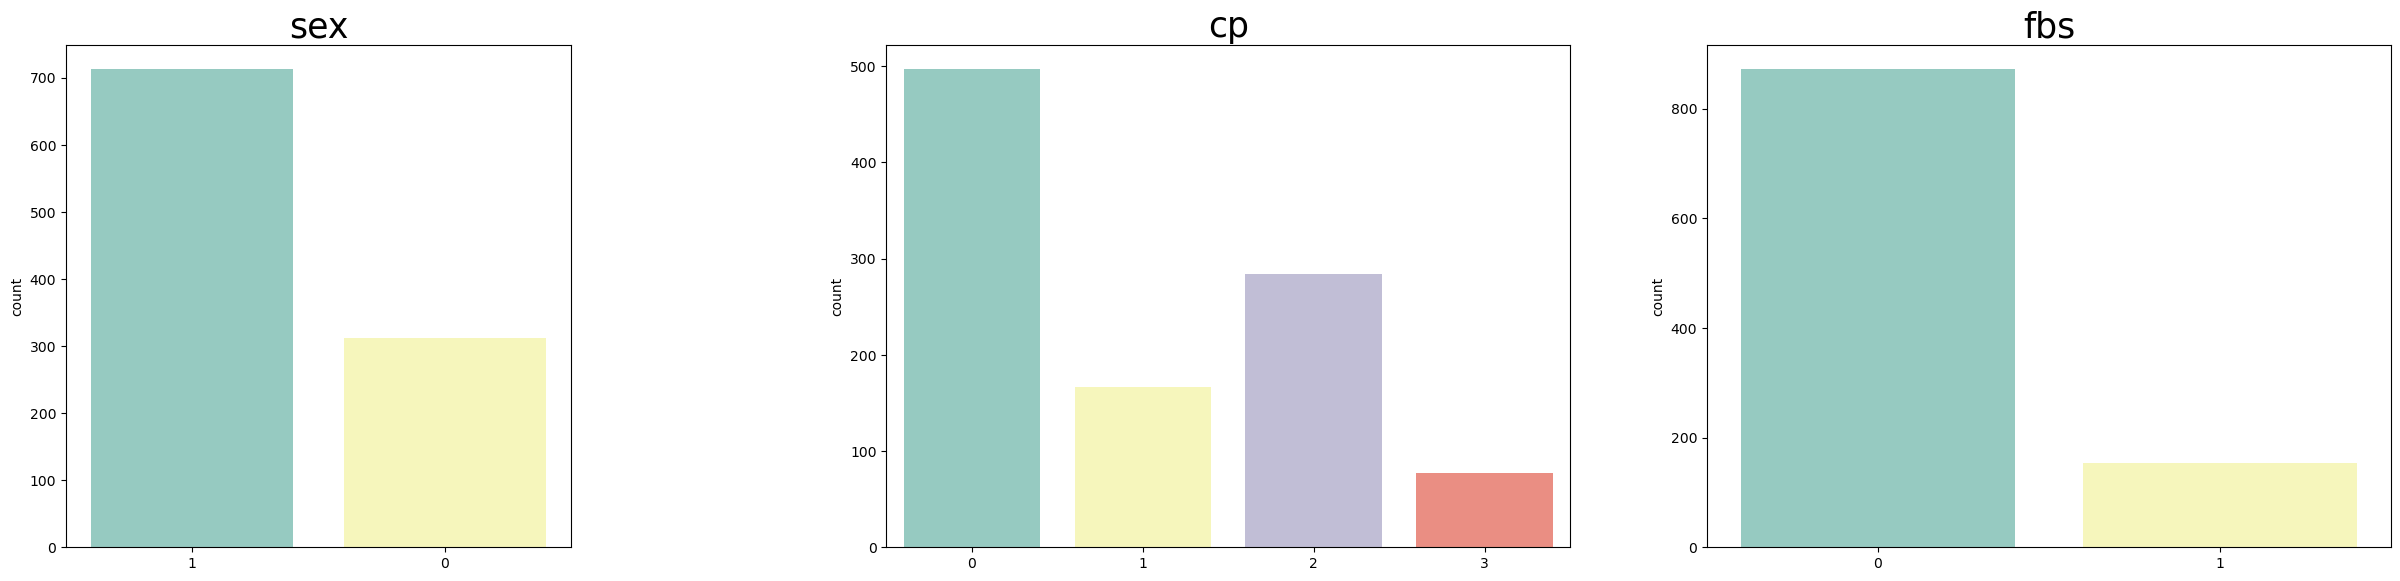

In [7]:
plt.figure(figsize=(30,30))
plt.subplot(4,4,1)
sns.countplot(x = 'sex',  palette='Set3', data = df, order = df['sex'].value_counts().index)
plt.gca().set(xlabel=None)
plt.title('sex', fontsize=25)

plt.subplot(4,3,2)
sns.countplot(x = 'cp', palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('cp', fontsize=25)

plt.subplot(4,3,3)
sns.countplot(x = 'fbs', palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('fbs', fontsize=25)



C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1215815037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'restecg',  palette='Set3', data = df)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1215815037.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'exang', palette='Set3', data = df)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1215815037.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'slope', palette='Set3', data = df)


Text(0.5, 1.0, 'slope')

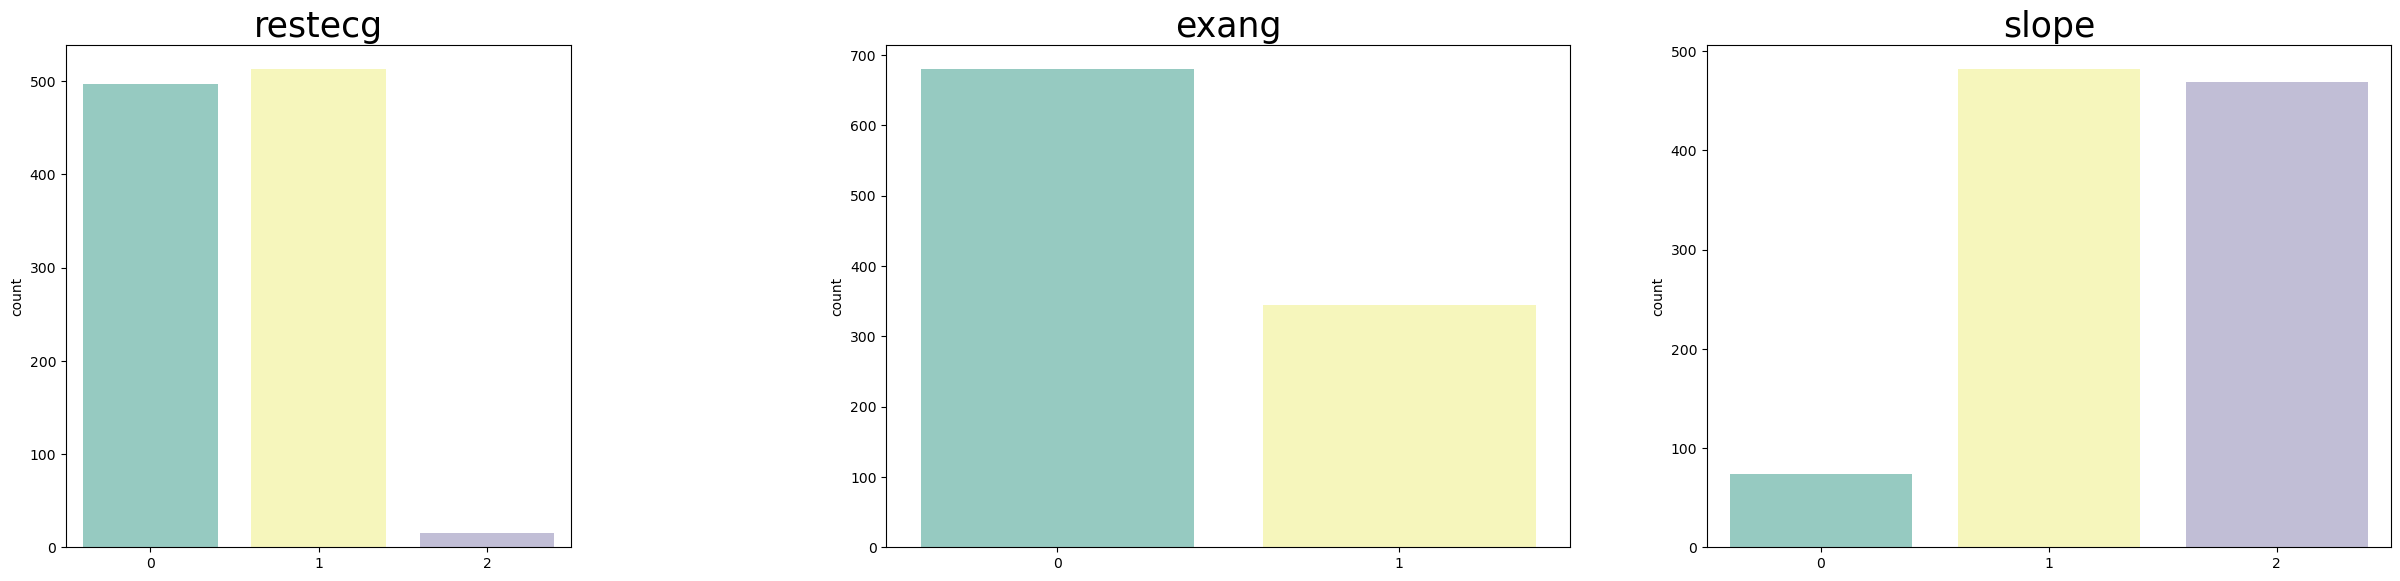

In [8]:
plt.figure(figsize=(30,30))
plt.subplot(4,4,1)
sns.countplot(x = 'restecg',  palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('restecg', fontsize=25)

plt.subplot(4,3,2)
sns.countplot(x = 'exang', palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('exang', fontsize=25)

plt.subplot(4,3,3)
sns.countplot(x = 'slope', palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('slope', fontsize=25)



C:\Users\marti\AppData\Local\Temp\ipykernel_28768\3205284847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'ca',  palette='Set3', data = df)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\3205284847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'thal', palette='Set3', data = df)


Text(0.5, 1.0, 'thal')

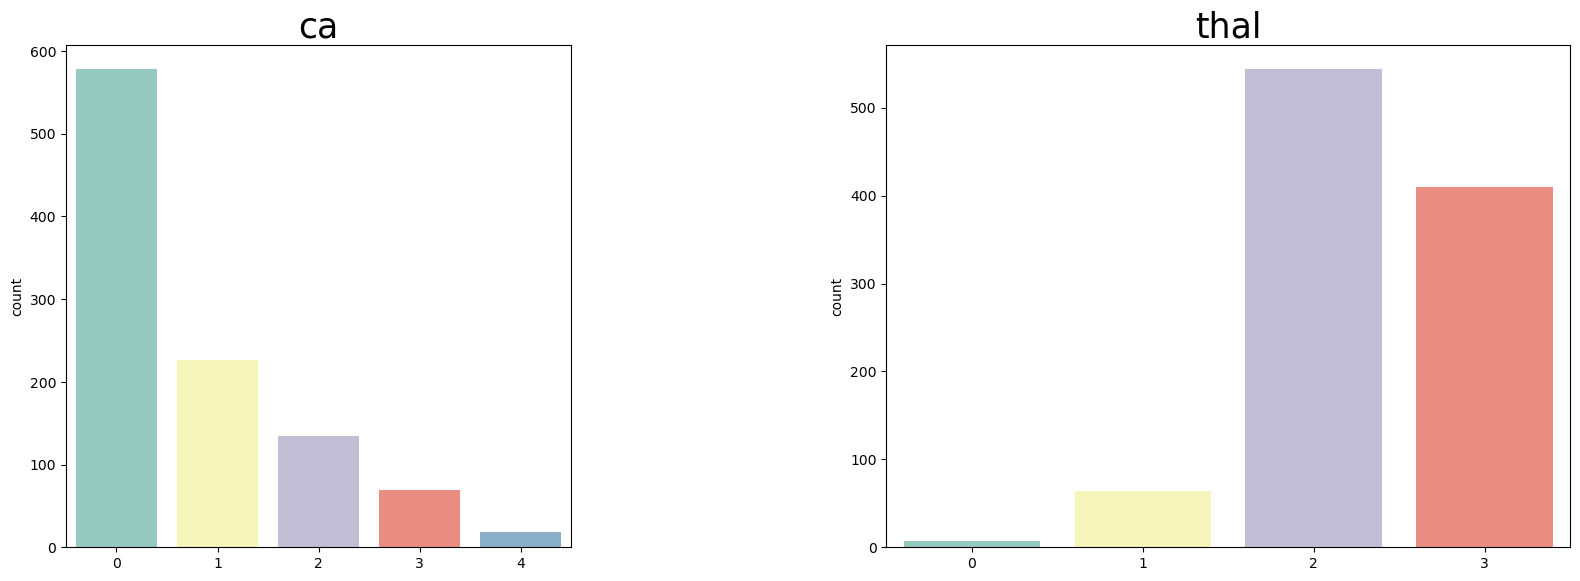

In [9]:
plt.figure(figsize=(30,30))
plt.subplot(4,4,1)
sns.countplot(x = 'ca',  palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('ca', fontsize=25)


plt.subplot(4,3,2)
sns.countplot(x = 'thal', palette='Set3', data = df)
plt.gca().set(xlabel=None)
plt.title('thal', fontsize=25)




C:\Users\marti\AppData\Local\Temp\ipykernel_28768\676090442.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.target, kde = False)


<Axes: xlabel='target'>

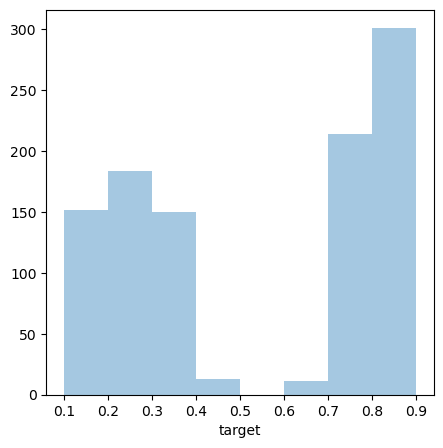

In [10]:
plt.figure(figsize=(5,5))
sns.distplot(df.target, kde = False)


C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1861250348.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age, kde = False)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1861250348.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.trestbps, kde = False)


<Axes: xlabel='trestbps'>

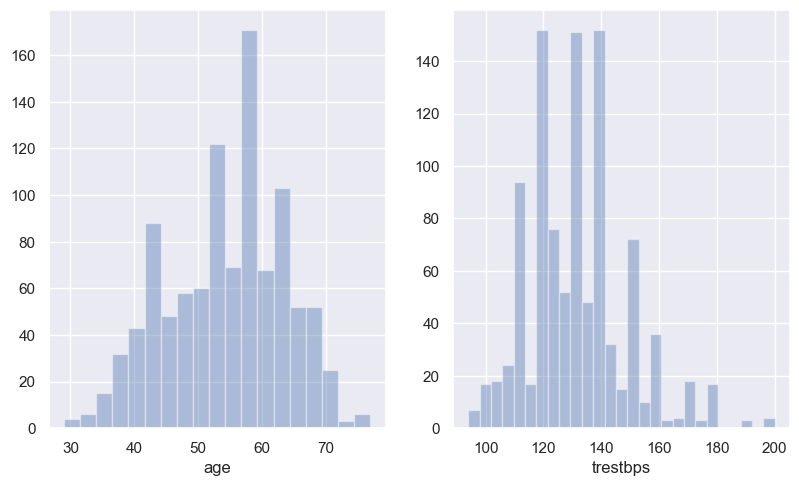

In [11]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(4,4,1)
sns.distplot(df.age, kde = False)

plt.subplot(4,4,2)
sns.distplot(df.trestbps, kde = False)





C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1536109636.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.chol, kde = False)
C:\Users\marti\AppData\Local\Temp\ipykernel_28768\1536109636.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.thalach, kde = False)
C:\Users\marti\AppData\

<Axes: xlabel='oldpeak'>

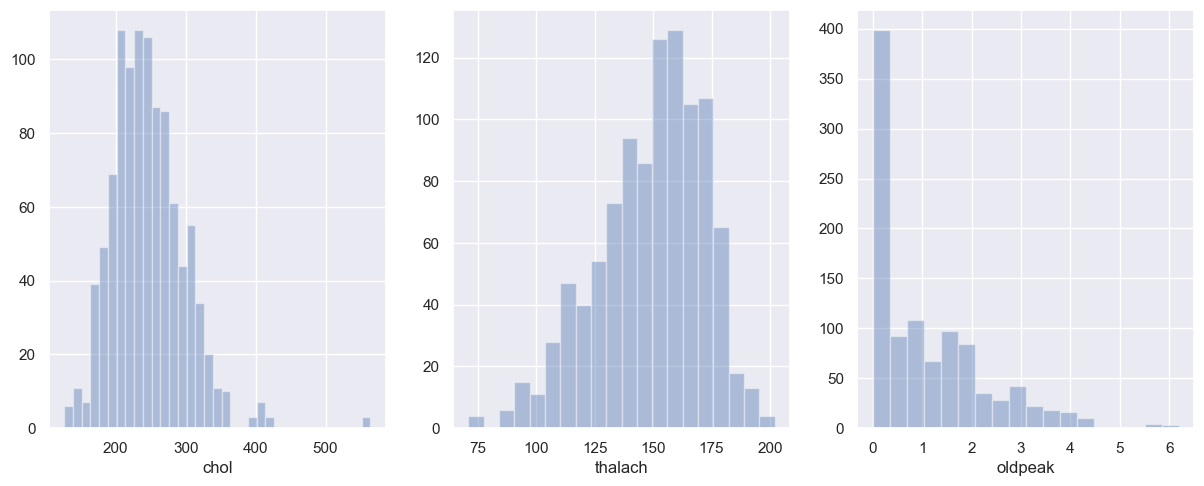

In [12]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(4,4,1)
sns.distplot(df.chol, kde = False)

plt.subplot(4,4,2)
sns.distplot(df.thalach, kde = False)

plt.subplot(4,4,3)
sns.distplot(df.oldpeak, kde = False)




Converting the continuous target values to discrete ones 

In [13]:
df['target'] = df['target'].apply(lambda x: 0 if x < 0.50 else 1)

Text(0.5, 1.0, 'Target distribution')

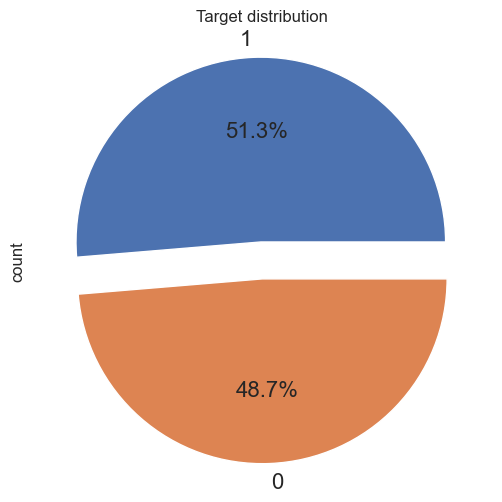

In [14]:
plt.figure(figsize=(6,6))


df['target'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Target distribution")



<Axes: >

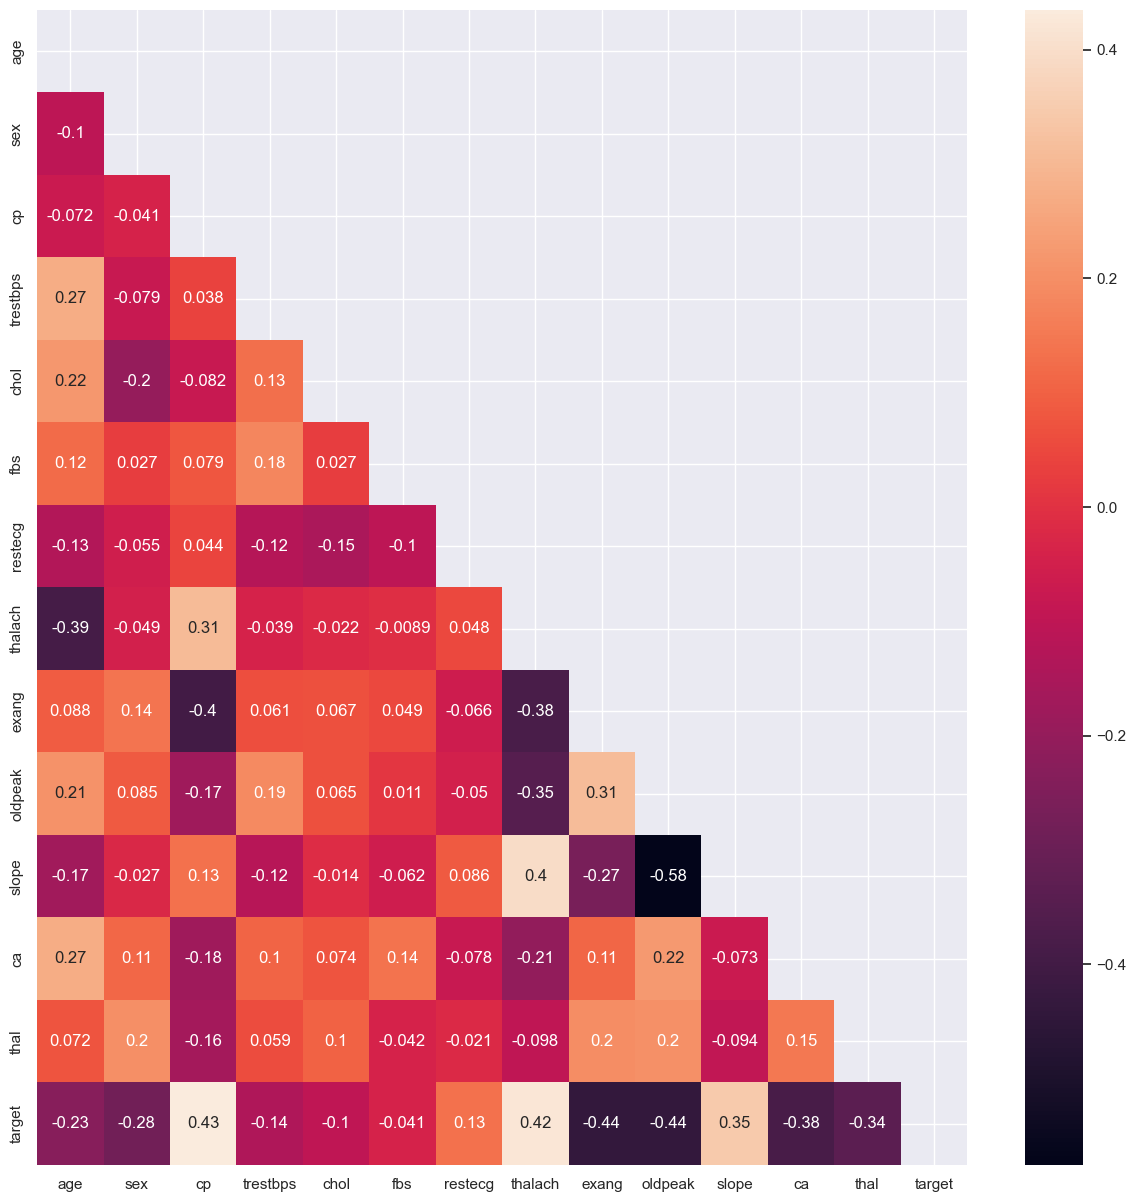

In [15]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,mask=np.triu(np.ones_like(corr,dtype=bool)))


In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
X = df.drop(columns='target', axis=1)
Y = df['target']
print(X)
print(Y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

Split data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=42)
print(X.shape, X_train.shape, X_test.shape, Y_train.shape)

(1025, 13) (820, 13) (205, 13) (820,)


In [23]:
from sklearn.metrics import accuracy_score, classification_report

rft = RandomForestClassifier( n_estimators = 100)
rft.fit(X_train, Y_train)

Y_pred = rft.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

